In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Data/WDICSV.csv')
data.shape

(396872, 68)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [3]:
data.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN
5,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.998898,67.022332,68.907404,70.663096,71.565376,72.611685,74.129923,75.559174,NaN,NaN
6,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like it has different indicators for different countries with the year and value of the indicator. 

### Unpivot the table

In [4]:
df_data = pd.melt(data, id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"], var_name="Year", value_name="Value")
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [9]:
df_data.dropna(inplace=True)
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
50,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,140.180526
56,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,89.594604
57,Africa Eastern and Southern,AFE,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.626944
58,Africa Eastern and Southern,AFE,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,83.668705
90,Africa Eastern and Southern,AFE,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,380.000000


In [10]:
df_data.shape

(8505965, 6)

### How many UNIQUE country names are there ?

In [11]:
countries = df_data['Country Name'].unique().tolist()
len(countries)

265

### Are there same number of country codes ?

In [12]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['Country Code'].unique().tolist()
len(countryCodes)

266

In [24]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [25]:
data[["Country Code","Country Name"]].drop_duplicates().head()

,Country Code,Country Name
0,AFE,Africa Eastern and Southern
1492,AFW,Africa Western and Central
2984,ARB,Arab World
4476,CSS,Caribbean small states
5968,CEB,Central Europe and the Baltics


### Are there many indicators or few ?

In [29]:
# How many unique indicators are there ? (should be the same #)
indicators = df_data['Indicator Name'].unique().tolist()
len(indicators)

1491

### How many years of data do we have ?

In [30]:
# How many years of data do we have ?
years = df_data['Year'].unique().tolist()
len(years)

64

### What's the range of years?

In [31]:
print(min(years)," to ",max(years))

1960  to  2023


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [41]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = df_data['Indicator Name'].str.contains(hist_indicator) 
mask2 = df_data['Country Code'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = df_data[mask1 & mask2]

In [42]:
stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
12286813,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,19.407336
12683685,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1991,19.003390
13080557,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1992,19.022845
13477429,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1993,19.218331
13874301,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1994,19.256185


In [50]:
stage.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year               object
Value             float64
dtype: object

In [52]:
stage["Year"] = stage["Year"].astype(int)

/tmp/ipykernel_153110/3610454771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage["Year"] = stage["Year"].astype(int)


### Let's see how emissions have changed over time using MatplotLib

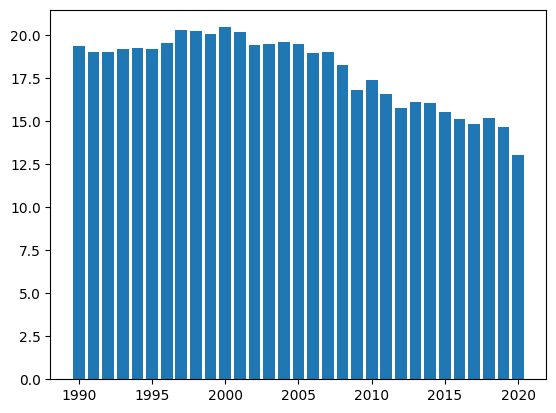

In [53]:
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

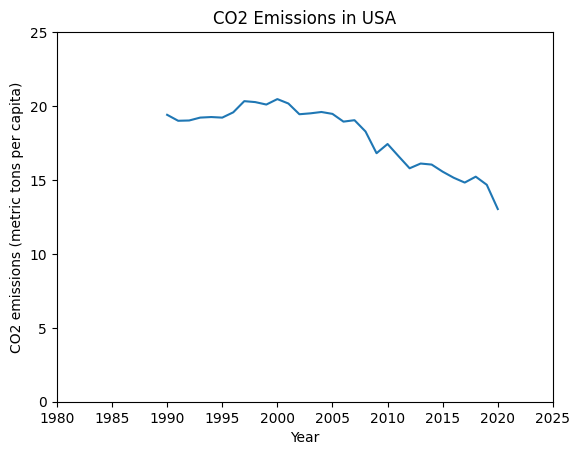

In [57]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['Indicator Name'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1980, 2025,0,25])
# plt.xlim(1980,2025)
# plt.ylim(0,25)

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [58]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [59]:
print(len(hist_data))

31


In [62]:
hist_data

array([19.40733586, 19.00338958, 19.02284515, 19.21833148, 19.25618525,
       19.216897  , 19.57536656, 20.33085305, 20.26628688, 20.10112278,
       20.46979674, 20.17153693, 19.44553028, 19.50650553, 19.59761671,
       19.46927252, 18.94591684, 19.04291178, 18.27849126, 16.80868142,
       17.43173699, 16.60418962, 15.78976015, 16.11117526, 16.04091676,
       15.56001544, 15.14988272, 14.82324544, 15.2225181 , 14.67338071,
       13.03282795])

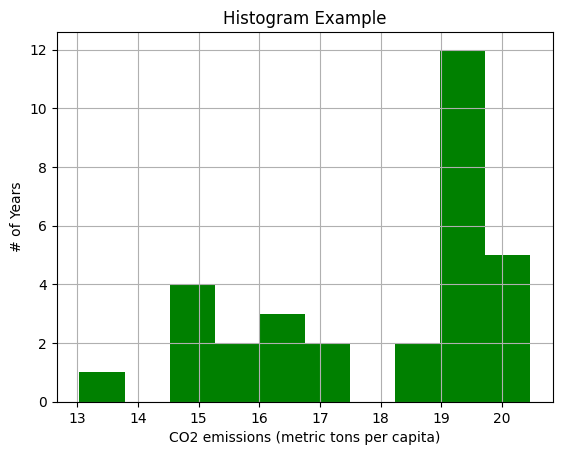

In [65]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['Indicator Name'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [69]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = "2011"

mask1 = df_data['Indicator Name'].str.contains(hist_indicator) 
mask2 = df_data['Year'].isin([hist_year])

# apply our mask
co2_2011 = df_data[mask1 & mask2]
co2_2011.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
20240665,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.976840
20242157,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.451578
20243649,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.209484
20245141,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.630149
20246633,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.810707


For how many countries do we have CO2 per capita emissions data in 2011

In [ ]:
print(len(co2_2011))

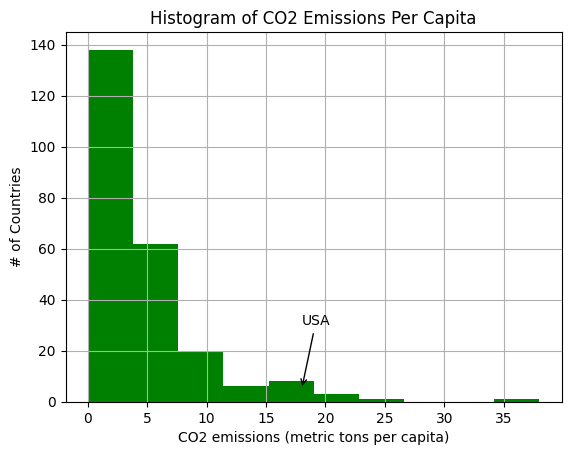

In [70]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['Indicator Name'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [77]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2015'
hist_country = 'USA'

mask1 = df_data['Indicator Name'].str.contains(hist_indicator) 
mask2 = df_data['Country Code'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = df_data[mask1 & mask2]

#plot gdp_stage vs stage

In [84]:
gdp_stage.loc[:,"Year"] = gdp_stage["Year"].astype(int)

In [85]:
gdp_stage.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
380939,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1960,19135.268182
777811,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1961,19253.547329


In [79]:
stage.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
12286813,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,19.407336
12683685,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1991,19.003390


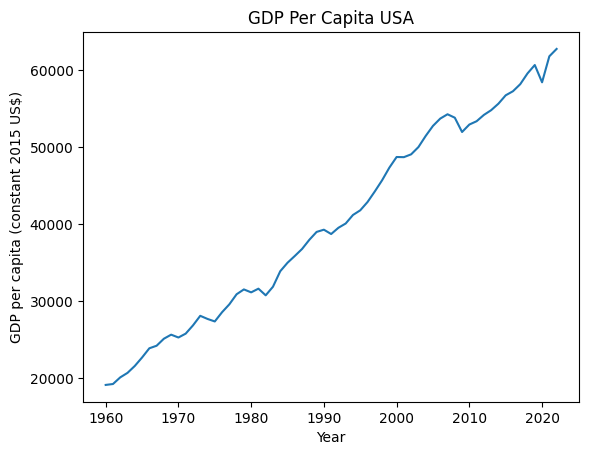

In [86]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['Indicator Name'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [87]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2022
CO2 Min Year =  1990 max:  2020


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [88]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
31


ValueError: x and y must be the same size

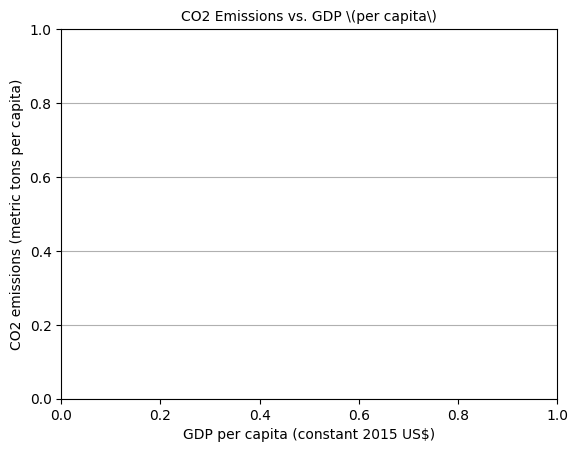

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['Indicator Name'].iloc[0],fontsize=10)
axis.set_ylabel(stage['Indicator Name'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [ ]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;